In [1]:
## main
import numpy as np   
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
from imblearn.over_sampling import SMOTE
from PIL import Image

## sklearn -- preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
# Custom transformer (DataFrameSelector):
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names]


## sklearn -- models
from sklearn.ensemble import RandomForestClassifier


## sklearn -- models
from sklearn.metrics import f1_score,confusion_matrix



In [2]:
## read dataset
TRATIN_PATH=os.path.join(os.getcwd(),'dataset.csv')
df=pd.read_csv(TRATIN_PATH)

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
## drop 3 first 3 features (unique data)
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
## filter outerliers in age using threshold
df.drop(index=df[df['Age']>80].index.to_list(),axis=0,inplace=True)   #Converts the index to a list of indices. (to_list())
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
## to features and target
x=df.drop(columns=['Exited'],axis=1)
y=df['Exited']

In [6]:
## split train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45,stratify=y)

In [7]:
## slice the list 
num_cols=['Age','CreditScore','Balance','EstimatedSalary']
categ_cols=['Gender','Geography']
ready_cols=list(set(X_train.columns.tolist())-set(num_cols)-set(categ_cols))   #convert to list
ready_cols

['Tenure', 'NumOfProducts', 'IsActiveMember', 'HasCrCard']

In [8]:
## --------------------- Data Processing ---------------------------- ##

## Slice the lists
num_cols = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
categ_cols = ['Gender', 'Geography']

ready_cols = list(set(X_train.columns.tolist()) - set(num_cols) - set(categ_cols))


## For Numerical
num_pipeline = Pipeline(steps=[
                        ('selector', DataFrameSelector(num_cols)),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                    ])


## For Categorical
categ_pipeline = Pipeline(steps=[
                        ('selector', DataFrameSelector(categ_cols)),
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('ohe', OneHotEncoder(drop='first', sparse_output=False))
                    ])


## For ready cols
ready_pipeline = Pipeline(steps=[
                        ('selector', DataFrameSelector(ready_cols)),
                        ('imputer', SimpleImputer(strategy='most_frequent'))
                    ])



## combine all
all_pipeline = FeatureUnion(transformer_list=[
                                    ('numerical', num_pipeline),
                                    ('categorical', categ_pipeline),
                                    ('ready', ready_pipeline)
                                ])

## apply
X_train_final = all_pipeline.fit_transform(X_train)
X_test_final = all_pipeline.transform(X_test)



In [9]:
## 1. use algorithm without taking the effect of imbalancing

## 2. prepare class_weights for solving imbalance dataset
vals_count = 1 - (np.bincount(y_train) / len(y_train))
vals_count = vals_count / np.sum(vals_count)  ## normalizing


dict_weights = {}
for i in range(2):  ## 2 classes (0, 1)
    dict_weights[i] = vals_count[i]
dict_weights

{0: 0.20387984981226537, 1: 0.7961201501877346}

In [10]:
## 3. Using SMOTE for over sampling
over = SMOTE(sampling_strategy=0.7)
X_train_resmapled, y_train_resampled = over.fit_resample(X_train_final, y_train)

In [11]:
## Clear metrics.txt file at the beginning
with open('metrics.txt', 'w') as f:
    pass


In [12]:
## --------------------- Modeling ---------------------------- ##
def train_model(X_train, y_train, plot_name='', class_weight=None):
    """ A function to train model given the required train data """
    
    global clf_name

    clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=45, class_weight=class_weight)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test_final)
    
    ## Using f1_score
    score_train = f1_score(y_train, y_pred_train)
    score_test = f1_score(y_test, y_pred_test)
    
    clf_name = clf.__class__.__name__

    ## Plot the confusion matrix 
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cbar=False, fmt='.2f', cmap='Blues')
    plt.title(f'{plot_name}')
    plt.xticks(ticks=np.arange(2) + 0.5, labels=[False, True])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=[False, True])

    ## Save the plot locally
    plt.savefig(f'{plot_name}.png', bbox_inches='tight', dpi=300)
    plt.close()


    ## Write scores to a file
    with open('metrics.txt', 'a') as f:
            f.write(f'{clf_name} {plot_name}\n')
            f.write(f"F1-score of Training is: {score_train*100:.2f} %\n")
            f.write(f"F1-Score of Validation is: {score_test*100:.2f} %\n")
            f.write('----'*10 + '\n')


    return True


In [13]:
## 1. without considering the imabalancing data
train_model(X_train=X_train_final, y_train=y_train, plot_name='without-imbalance', class_weight=None)

True

In [14]:
## 2. with considering the imabalancing data using class_weights
train_model(X_train=X_train_final, y_train=y_train, plot_name='with-class-weights', class_weight=dict_weights)


True

In [15]:
## 3. with considering the imabalancing data using oversampled data (SMOTE)
train_model(X_train=X_train_resmapled, y_train=y_train_resampled, plot_name=f'with-SMOTE', class_weight=None)

True

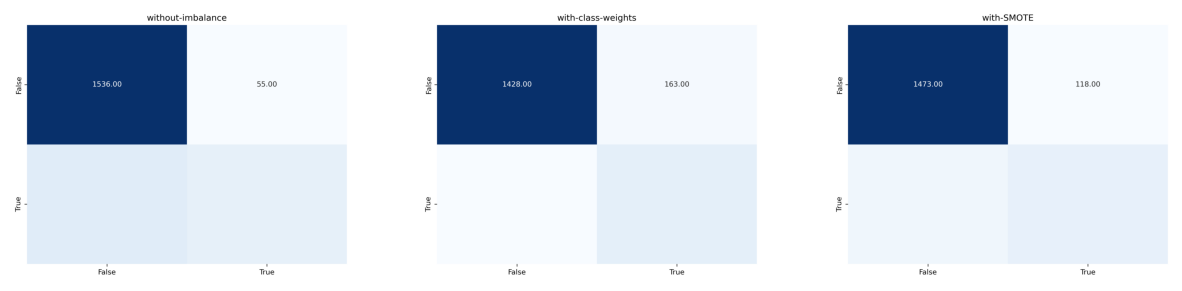

In [16]:
## Combine all conf matrix in one
confusion_matrix_paths = [f'./without-imbalance.png', f'./with-class-weights.png', f'./with-SMOTE.png']

## Load and plot each confusion matrix
plt.figure(figsize=(15, 5))  # Adjust figure size as needed
for i, path in enumerate(confusion_matrix_paths, 1):
    img = Image.open(path)
    plt.subplot(1, len(confusion_matrix_paths), i)
    plt.imshow(img)
    plt.axis('off')  # Disable axis for cleaner visualization

In [17]:
## Save combined plot locally
plt.suptitle(clf_name, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f'conf_matrix.png', bbox_inches='tight', dpi=300)


<Figure size 640x480 with 0 Axes>

In [18]:
## Delete old image files
for path in confusion_matrix_paths:
    os.remove(path)